ALD Classification -
Anthony DiBenedetto

This program uses Nearest Neighbor (nn) to classify the ALD data. The accuracy of the classification is caculated and printed out in on the of the bottom cells. Also shown is a confusion matrix of the classification to show the accuracy of the classification. 

In [8]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
# Load the training and test data
training_data = (np.load('ALD_Classification_dataset/training_data.npy'))
training_labels = (np.load('ALD_Classification_dataset/training_labels.npy'))

testing_data = (np.load('ALD_Classification_dataset/testing_data.npy'))
testing_labels = (np.load('ALD_Classification_dataset/testing_labels.npy'))

In [10]:
X_train = training_data
y_train = training_labels


X_test = testing_data
y_test = testing_labels

In [11]:
# Initialize the nearest neighbor classifier and fit the model with the training data
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto',  leaf_size=30)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [12]:
# Use the model to predict 0 or 1 from the X_test
y_pred = knn.predict(X_test)

In [13]:
# Generate the accuracy from the predicted y values (y_pred) and y_test 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

# Generate the confusion matrix from predicted y values (y_pred) and y_test 
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

Accuracy: 98.50%
Confusion matrix:
 [[611   8]
 [  7 374]]


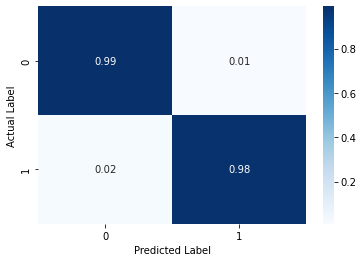

In [14]:
# Use seaborn package to make the confusion matrix look nice, as well as normilize the confusion matrix
import seaborn as sns
cm_normalized = np.round(cm/np.sum(cm, axis=1).reshape(-1, 1), 2) 
sns.heatmap(cm_normalized, cmap="Blues", annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

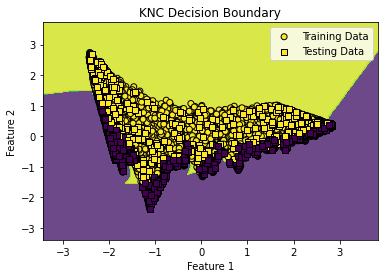

In [15]:
from sklearn.decomposition import PCA

# Reduce dataset dimensions to 2D using PCA
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

# Train SVM classifier
classifier = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto',  leaf_size=30)
classifier.fit(X_train_2D, y_train)

# Create a meshgrid
h = 0.02  # step size in the mesh
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundaries
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolors='k', marker='o', label='Training Data')
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, edgecolors='k', marker='s', label='Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNC Decision Boundary')
plt.legend()

plt.show()